In [2]:
print("hello world")

hello world


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("praveengovi/emotions-dataset-for-nlp")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\j\.cache\kagglehub\datasets\praveengovi\emotions-dataset-for-nlp\versions\1


In [6]:
import pandas as pd
import os

# Path from kagglehub result
base_path = r"C:\Users\j\.cache\kagglehub\datasets\praveengovi\emotions-dataset-for-nlp\versions\1"


train_path = os.path.join(base_path, "train.txt")
test_path = os.path.join(base_path, "test.txt")
val_path = os.path.join(base_path, "val.txt")

# Function to load dataset
def load_emotion_data(path):
    df = pd.read_csv(path, sep=';', header=None, names=['text', 'emotion'])
    return df

train_df = load_emotion_data(train_path)
test_df = load_emotion_data(test_path)
val_df = load_emotion_data(val_path)

train_df.head()


,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [7]:
train_df.info

<bound method DataFrame.info of                                                     text  emotion
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
15995  i just had a very brief time in the beanbag an...  sadness
15996  i am now turning and i feel pathetic that i am...  sadness
15997                     i feel strong and good overall      joy
15998  i feel like this was such a rude comment and i...    anger
15999  i know a lot but i feel so stupid because i ca...  sadness

[16000 rows x 2 columns]>

In [8]:
train_df.shape

(16000, 2)

In [10]:
train_df.describe()

,text,emotion
count,16000,16000
unique,15969,6
top,i feel on the verge of tears from weariness i ...,joy
freq,2,5362


In [ ]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import joblib

# Use the train/val/test data already loaded from files
X_train, y_train = train_df['text'].astype(str), train_df['emotion']
X_val, y_val = val_df['text'].astype(str), val_df['emotion']

# Vectorize
vec = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
Xtr = vec.fit_transform(X_train)
Xv = vec.transform(X_val)

# Train Logistic Regression
print("Training Logistic Regression...")
clf = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
clf.fit(Xtr, y_train)
pred = clf.predict(Xv)
print("\nLogistic Regression Report:")
print(classification_report(y_val, pred, digits=4))

# Train SVM (Linear SVC)
print("\n" + "="*60)
print("Training Linear SVM...")
svm = LinearSVC(class_weight='balanced', max_iter=10000, random_state=42)
svm.fit(Xtr, y_train)
pred_svm = svm.predict(Xv)
print("\nLinear SVM Report:")
print(classification_report(y_val, pred_svm, digits=4))

# Save all models
joblib.dump(vec, "tfidf_vectorizer.joblib")
joblib.dump(clf, "logistic_regression.joblib")
joblib.dump(svm, "linear_svm.joblib")
print("\nSaved: tfidf_vectorizer.joblib, logistic_regression.joblib, linear_svm.joblib")


Training Linear SVM...

Linear SVM Report:
              precision    recall  f1-score   support

       anger     0.9194    0.9127    0.9161       275
        fear     0.8950    0.8443    0.8689       212
         joy     0.9336    0.9190    0.9263       704
        love     0.8051    0.8820    0.8418       178
     sadness     0.9239    0.9273    0.9256       550
    surprise     0.7701    0.8272    0.7976        81

    accuracy                         0.9055      2000
   macro avg     0.8745    0.8854    0.8794      2000
weighted avg     0.9068    0.9055    0.9059      2000


Saved: tfidf_vectorizer.joblib, logistic_regression.joblib, linear_svm.joblib


In [25]:
print("Training 5 additional models...")

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import joblib

# 1. Random Forest
print("\n1. Training Random Forest...")
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(Xtr, y_train)
pred_rf = rf.predict(Xv)
print(classification_report(y_val, pred_rf, digits=4))
joblib.dump(rf, "random_forest.joblib")

# 2. Gradient Boosting (FASTER)
print("\n2. Training Gradient Boosting...")
gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(Xtr, y_train)
pred_gb = gb.predict(Xv)
print(classification_report(y_val, pred_gb, digits=4))
joblib.dump(gb, "gradient_boosting.joblib")

# 3. Naive Bayes
print("\n3. Training Naive Bayes...")
nb = MultinomialNB()
nb.fit(Xtr, y_train)
pred_nb = nb.predict(Xv)
print(classification_report(y_val, pred_nb, digits=4))
joblib.dump(nb, "naive_bayes.joblib")

print("\n✓ All models trained!")

Training 5 additional models...

1. Training Random Forest...
              precision    recall  f1-score   support

       anger     0.9143    0.8145    0.8615       275
        fear     0.8221    0.8066    0.8143       212
         joy     0.8337    0.9545    0.8901       704
        love     0.8889    0.7191    0.7950       178
     sadness     0.9174    0.8891    0.9030       550
    surprise     0.8906    0.7037    0.7862        81

    accuracy                         0.8705      2000
   macro avg     0.8779    0.8146    0.8417      2000
weighted avg     0.8738    0.8705    0.8690      2000


2. Training Gradient Boosting...
              precision    recall  f1-score   support

       anger     0.9511    0.6364    0.7625       275
        fear     0.9362    0.6226    0.7479       212
         joy     0.6456    0.9730    0.7762       704
        love     0.9070    0.6573    0.7622       178
     sadness     0.9454    0.7236    0.8198       550
    surprise     0.8594    0.6790   

c:\Users\j\Desktop\NovaNurture_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\j\Desktop\NovaNurture_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\j\Desktop\NovaNurture_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

In [ ]:
print( "NEW CELL - Verify all models trained")
import os
import joblib

models_to_check = [
    "logistic_regression.joblib",
    "linear_svm.joblib",
    "random_forest.joblib",
    "gradient_boosting.joblib",
    "naive_bayes.joblib"
]

print("Checking if all models exist...")
print("="*50)

for model_file in models_to_check:
    if os.path.exists(model_file):
        # Load and get file size
        size = os.path.getsize(model_file) / (1024*1024)  
        print(f" {model_file:<30} ({size:.2f} MB)")
    else:
        print(f" {model_file:<30} NOT FOUND")

print("="*50)
print("All models ready for comparison!")

NEW CELL - Verify all models trained
Checking if all models exist...
✅ logistic_regression.joblib     (0.92 MB)
✅ linear_svm.joblib              (0.92 MB)
✅ random_forest.joblib           (49.17 MB)
✅ gradient_boosting.joblib       (0.36 MB)
✅ naive_bayes.joblib             (1.83 MB)
All models ready for comparison!


In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading all models for comparison.")
lr = joblib.load("logistic_regression.joblib")
svm = joblib.load("linear_svm.joblib")
rf = joblib.load("random_forest.joblib")
gb = joblib.load("gradient_boosting.joblib")
nb = joblib.load("naive_bayes.joblib")

# Get predictions from all 5 models
models_dict = {
    'Logistic Regression': lr,
    'SVM': svm,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Naive Bayes': nb
}

print("\nGenerating predictions.")
predictions = {}
for name, model in models_dict.items():
    predictions[name] = model.predict(Xv)

# Create comparison table with NUMBERS (not strings!)
print("\n" + "="*100)
print("PERFORMANCE METRICS COMPARISON")
print("="*100)

metrics_list = []
for name, pred in predictions.items():
    metrics_list.append({
        'Model': name,
        'Accuracy': accuracy_score(y_val, pred),
        'Precision': precision_score(y_val, pred, average='macro', zero_division=0),
        'Recall': recall_score(y_val, pred, average='macro', zero_division=0),
        'F1 Score': f1_score(y_val, pred, average='macro', zero_division=0)
    })

metrics_df = pd.DataFrame(metrics_list)

# Format for display
display_df = metrics_df.copy()
for col in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    display_df[col] = display_df[col].apply(lambda x: f"{x:.4f}")

print(display_df.to_string(index=False))
print("="*100)
print("✓ Metrics table ready for cell #VSC-0e59058e")

Loading all models for comparison.

Generating predictions.

PERFORMANCE METRICS COMPARISON
              Model Accuracy Precision Recall F1 Score
Logistic Regression   0.8775    0.8370 0.8661   0.8493
                SVM   0.9055    0.8745 0.8854   0.8794
      Random Forest   0.8705    0.8779 0.8146   0.8417
  Gradient Boosting   0.7810    0.8741 0.7153   0.7712
        Naive Bayes   0.6465    0.6941 0.3912   0.3829
✓ Metrics table ready for cell #VSC-0e59058e


Summary metrics (validation set):
lr_accuracy: 0.8775
svm_accuracy: 0.9055
lr_macro_f1: 0.8493
svm_macro_f1: 0.8794
lr_micro_f1: 0.8775
svm_micro_f1: 0.9055

Logistic Regression classification report:
              precision    recall  f1-score   support

       anger     0.8813    0.8909    0.8861       275
        fear     0.8350    0.8113    0.8230       212
         joy     0.9240    0.8807    0.9018       704
        love     0.7489    0.9382    0.8329       178
     sadness     0.9137    0.8855    0.8994       550
    surprise     0.7191    0.7901    0.7529        81

    accuracy                         0.8775      2000
   macro avg     0.8370    0.8661    0.8493      2000
weighted avg     0.8820    0.8775    0.8785      2000


Linear SVM classification report:
              precision    recall  f1-score   support

       anger     0.9194    0.9127    0.9161       275
        fear     0.8950    0.8443    0.8689       212
         joy     0.9336    0.9190    0.9263       704
    

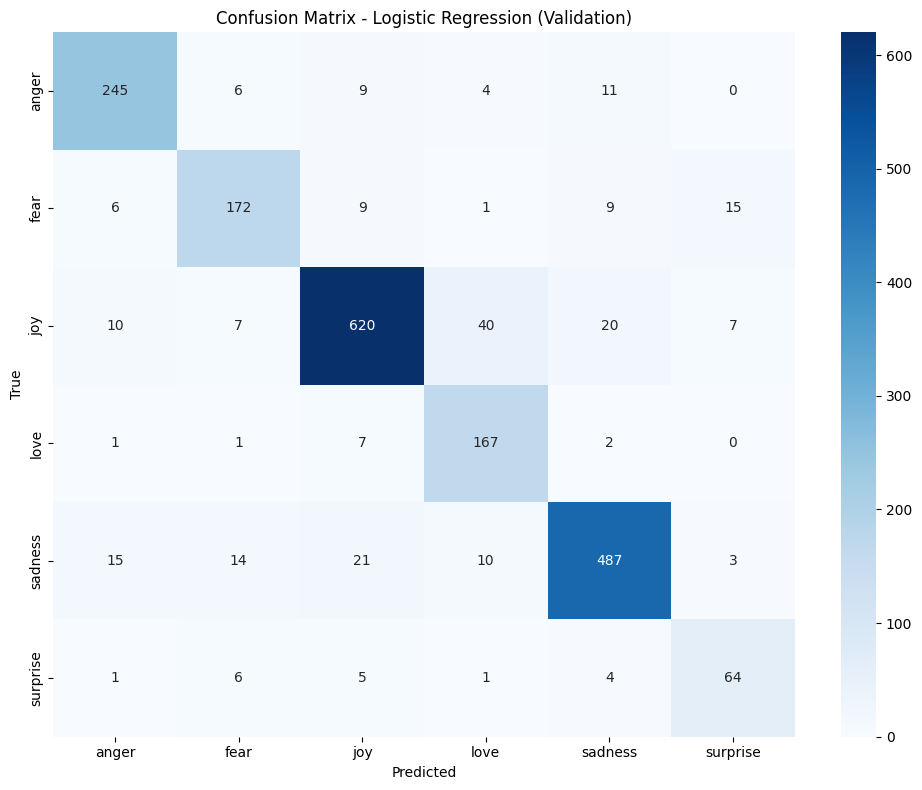

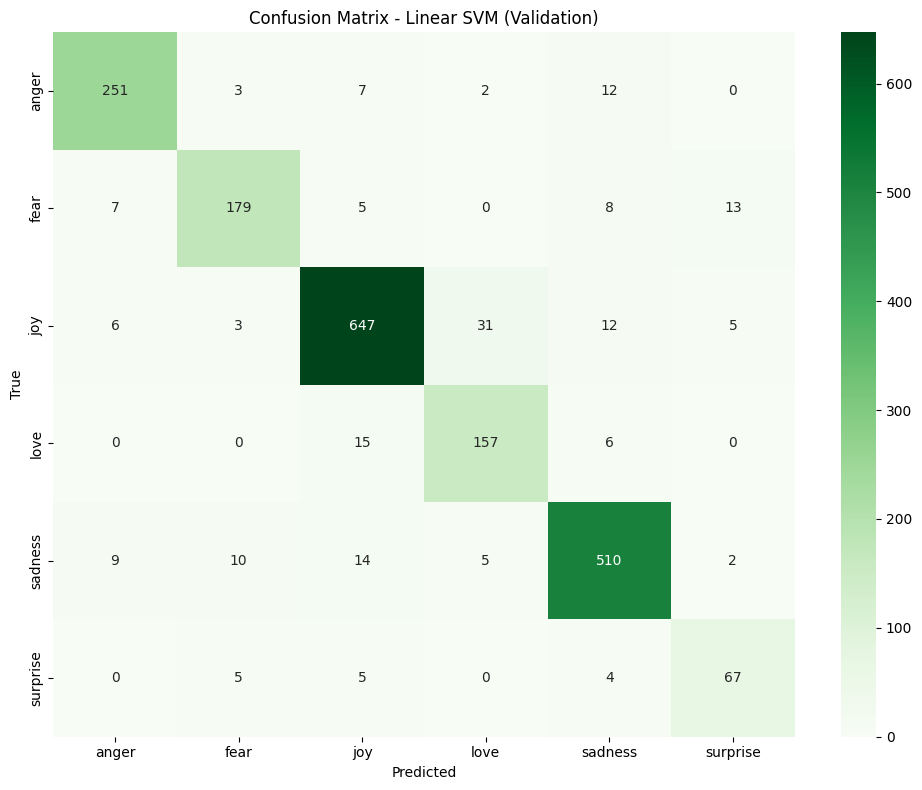

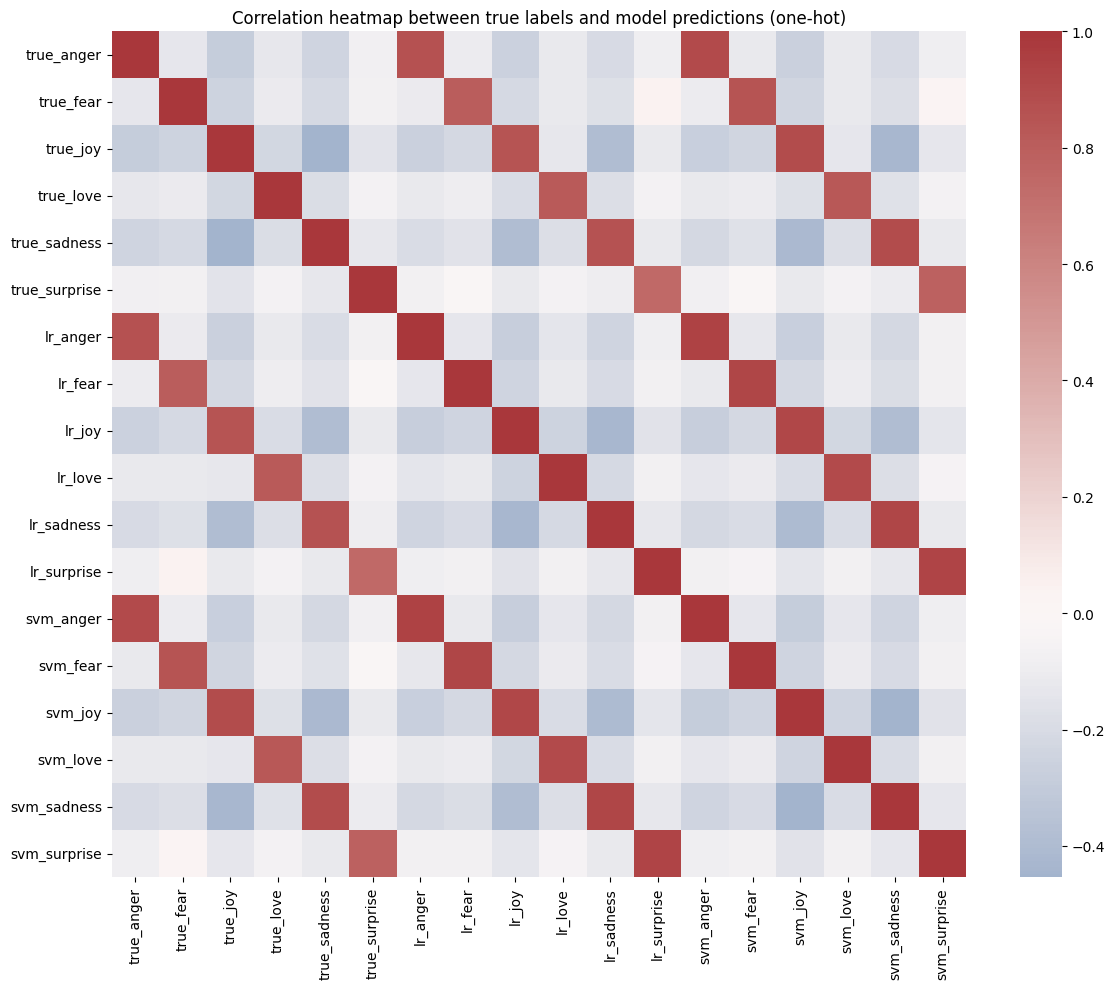


Per-class agreement (lr vs svm) on examples of that true class:
anger: 0.953
fear: 0.958
joy: 0.938
love: 0.916
sadness: 0.940
surprise: 0.926

Saved figures to figures/


In [18]:
# New cell: comparison, confusion matrices and correlation heatmap
# Installs (only if needed) and imports
import sys, subprocess
def _pip(pkg):
    subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])
try:
    import seaborn as sns
    import matplotlib.pyplot as plt
except Exception:
    _pip("seaborn")
    _pip("matplotlib")
    import seaborn as sns
    import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import pandas as pd
import numpy as np
import joblib
import os

# Ensure data and models are available in the notebook (load if not present)
if 'val_df' not in globals() or 'test_df' not in globals() or 'train_df' not in globals():
    base_path = r"C:\Users\j\.cache\kagglehub\datasets\praveengovi\emotions-dataset-for-nlp\versions\1"
    def load_emotion_data(path):
        return pd.read_csv(path, sep=';', header=None, names=['text','emotion'])
    train_df = load_emotion_data(os.path.join(base_path, "train.txt"))
    val_df = load_emotion_data(os.path.join(base_path, "val.txt"))
    test_df = load_emotion_data(os.path.join(base_path, "test.txt"))

X_val = val_df['text'].astype(str)
y_val = val_df['emotion']

# Load models/vectorizer if not in memory
if 'vec' not in globals():
    vec = joblib.load("tfidf_vectorizer.joblib")
if 'lr' not in globals():
    lr = joblib.load("logistic_regression.joblib")
if 'svm' not in globals():
    svm = joblib.load("linear_svm.joblib")

# Get predictions (ensure we transform text)
Xv = vec.transform(X_val)
pred_val_lr = lr.predict(Xv)
pred_val_svm = svm.predict(Xv)

# Basic metrics
metrics = {}
metrics['lr_accuracy'] = accuracy_score(y_val, pred_val_lr)
metrics['svm_accuracy'] = accuracy_score(y_val, pred_val_svm)
metrics['lr_macro_f1'] = f1_score(y_val, pred_val_lr, average='macro')
metrics['svm_macro_f1'] = f1_score(y_val, pred_val_svm, average='macro')
metrics['lr_micro_f1'] = f1_score(y_val, pred_val_lr, average='micro')
metrics['svm_micro_f1'] = f1_score(y_val, pred_val_svm, average='micro')

print("Summary metrics (validation set):")
for k,v in metrics.items():
    print(f"{k}: {v:.4f}")

print("\nLogistic Regression classification report:")
print(classification_report(y_val, pred_val_lr, digits=4))
print("\nLinear SVM classification report:")
print(classification_report(y_val, pred_val_svm, digits=4))

# Confusion matrices
labels = sorted(list(pd.Categorical(y_val).categories)) if hasattr(pd.Categorical(y_val), 'categories') else sorted(y_val.unique())
cm_lr = confusion_matrix(y_val, pred_val_lr, labels=labels)
cm_svm = confusion_matrix(y_val, pred_val_svm, labels=labels)

plt.figure(figsize=(10,8))
sns.heatmap(cm_lr, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (Validation)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(cm_svm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Greens")
plt.title("Confusion Matrix - Linear SVM (Validation)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# Agreement and correlation heatmap between model predictions (one-hot encoded)
res_df = pd.DataFrame({"true": y_val.values, "lr": pred_val_lr, "svm": pred_val_svm})
# One-hot encode predictions per class
lr_onehot = pd.get_dummies(res_df['lr'], prefix="lr")
svm_onehot = pd.get_dummies(res_df['svm'], prefix="svm")
true_onehot = pd.get_dummies(res_df['true'], prefix="true")

# Combine aligned columns (ensure same class columns order)
all_cols = sorted(set([c.split("_",1)[1] for c in list(lr_onehot.columns)+list(svm_onehot.columns)+list(true_onehot.columns)]))
lr_onehot = pd.DataFrame({f"lr_{c}": lr_onehot.get(f"lr_{c}", 0) for c in all_cols})
svm_onehot = pd.DataFrame({f"svm_{c}": svm_onehot.get(f"svm_{c}", 0) for c in all_cols})
true_onehot = pd.DataFrame({f"true_{c}": true_onehot.get(f"true_{c}", 0) for c in all_cols})

combined = pd.concat([true_onehot, lr_onehot, svm_onehot], axis=1)

# Correlation matrix
corr = combined.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="vlag", center=0, annot=False)
plt.title("Correlation heatmap between true labels and model predictions (one-hot)")
plt.tight_layout()
plt.show()

# Agreement statistics per class
agreement = {}
for c in all_cols:
    idx = (res_df['true'] == c)
    if idx.sum() == 0:
        continue
    same = (res_df.loc[idx, 'lr'] == res_df.loc[idx, 'svm']).sum()
    agreement[c] = same / idx.sum()

print("\nPer-class agreement (lr vs svm) on examples of that true class:")
for c, a in agreement.items():
    print(f"{c}: {a:.3f}")

# Save figures to files for later inspection
out_dir = "figures"
os.makedirs(out_dir, exist_ok=True)

# Save confusion matrices as images
import matplotlib
matplotlib.use("Agg")
fig = plt.figure(figsize=(10,8))
sns.heatmap(cm_lr, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (Validation)")
plt.xlabel("Predicted"); plt.ylabel("True")
fig.savefig(os.path.join(out_dir, "confusion_lr.png"))
plt.close(fig)

fig = plt.figure(figsize=(10,8))
sns.heatmap(cm_svm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Greens")
plt.title("Confusion Matrix - Linear SVM (Validation)")
plt.xlabel("Predicted"); plt.ylabel("True")
fig.savefig(os.path.join(out_dir, "confusion_svm.png"))
plt.close(fig)

fig = plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="vlag", center=0)
plt.title("Correlation heatmap between true labels and model predictions (one-hot)")
fig.savefig(os.path.join(out_dir, "prediction_correlation_heatmap.png"))
plt.close(fig)

print(f"\nSaved figures to {out_dir}/")
# ...existing code...

In [20]:
print("CONFUSION MATRICES FOR ALL 5 MODELS")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

# Create output directory
out_dir = "figures"
os.makedirs(out_dir, exist_ok=True)

# Get all unique labels
labels = sorted(y_val.unique())

# Define models and their predictions
all_models = {
    'Logistic Regression': predictions['Logistic Regression'],
    'SVM': predictions['SVM'],
    'Random Forest': predictions['Random Forest'],
    'Gradient Boosting': predictions['Gradient Boosting'],
    'Naive Bayes': predictions['Naive Bayes']
}

# Create confusion matrix for each model
colormaps = ['Blues', 'Greens', 'Oranges', 'Purples', 'RdPu']

for idx, (model_name, pred) in enumerate(all_models.items()):
    print(f"\n{model_name}...")
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_val, pred, labels=labels)
    
    # Create figure
    fig = plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, 
                cmap=colormaps[idx], cbar=True)
    plt.title(f"Confusion Matrix - {model_name}", fontsize=14, fontweight='bold')
    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("True", fontsize=12)
    plt.tight_layout()
    
    # Save figure
    filename = f"confusion_{model_name.lower().replace(' ', '_')}.png"
    filepath = os.path.join(out_dir, filename)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✅ Saved: {filepath}")

print("\n" + "="*60)
print("✅ ALL CONFUSION MATRICES SAVED!")
print("="*60)

CONFUSION MATRICES FOR ALL 5 MODELS

Logistic Regression...


C:\Users\j\AppData\Local\Temp\ipykernel_11000\1231057614.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


✅ Saved: figures\confusion_logistic_regression.png

SVM...


C:\Users\j\AppData\Local\Temp\ipykernel_11000\1231057614.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


✅ Saved: figures\confusion_svm.png

Random Forest...


C:\Users\j\AppData\Local\Temp\ipykernel_11000\1231057614.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


✅ Saved: figures\confusion_random_forest.png

Gradient Boosting...


C:\Users\j\AppData\Local\Temp\ipykernel_11000\1231057614.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


✅ Saved: figures\confusion_gradient_boosting.png

Naive Bayes...


C:\Users\j\AppData\Local\Temp\ipykernel_11000\1231057614.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


✅ Saved: figures\confusion_naive_bayes.png

✅ ALL CONFUSION MATRICES SAVED!


In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

print("Creating Scatter Plots WITH DECISION BOUNDARIES...")

# Reduce dimensions to 2D for visualization (using PCA)
pca = PCA(n_components=2)
X_val_2d = pca.fit_transform(Xv.toarray())

print(f"✅ Reduced to 2D (explains {pca.explained_variance_ratio_.sum():.2%} of variance)")

# Get predictions from all 5 models
models_dict = {
    'Logistic Regression': lr,
    'SVM': svm,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Naive Bayes': nb
}

# Create scatter plot for each model
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
axes = axes.flatten()

emotion_labels = sorted(y_val.unique())
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F38181', '#AA96DA', '#FCBAD3']
color_map = {label: colors[i % len(colors)] for i, label in enumerate(emotion_labels)}

# Create mesh for decision boundary
h = 0.05  # step size in mesh (increased for speed)
x_min, x_max = X_val_2d[:, 0].min() - 1, X_val_2d[:, 0].max() + 1
y_min, y_max = X_val_2d[:, 1].min() - 1, X_val_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for idx, (model_name, model) in enumerate(models_dict.items()):
    ax = axes[idx]
    
    print(f"Processing {model_name}...")
    
    # Get predictions on mesh (for boundary)
    # Transform mesh points back to original feature space
    mesh_points_2d = np.c_[xx.ravel(), yy.ravel()]
    mesh_points_original = pca.inverse_transform(mesh_points_2d)
    Z = model.predict(mesh_points_original)
    
    # Convert to numeric for contour
    Z_numeric = np.array([emotion_labels.index(z) for z in Z])
    Z_numeric = Z_numeric.reshape(xx.shape)
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z_numeric, alpha=0.3, cmap='Set3')
    ax.contour(xx, yy, Z_numeric, colors='black', linewidths=0.5, alpha=0.5)
    
    # Plot actual data points
    for emotion in emotion_labels:
        mask = y_val == emotion
        ax.scatter(X_val_2d[mask, 0], X_val_2d[mask, 1], 
                  c=color_map[emotion], label=emotion, 
                  s=80, edgecolors='black', linewidth=1.5, marker='o')
    
    ax.set_title(f'{model_name}', fontweight='bold', fontsize=13)
    ax.set_xlabel('PC1', fontsize=11)
    ax.set_ylabel('PC2', fontsize=11)
    ax.legend(loc='best', fontsize=8, framealpha=0.9)
    ax.grid(True, alpha=0.2)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# Hide extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.savefig('figures/scatter_plots_with_boundaries.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Scatter plots WITH BOUNDARIES saved to figures/scatter_plots_with_boundaries.png")

Creating Scatter Plots WITH DECISION BOUNDARIES...
✅ Reduced to 2D (explains 1.08% of variance)
Processing Logistic Regression...
Processing SVM...
Processing Random Forest...
Processing Gradient Boosting...
Processing Naive Bayes...
✅ Scatter plots WITH BOUNDARIES saved to figures/scatter_plots_with_boundaries.png


C:\Users\j\AppData\Local\Temp\ipykernel_11000\3011220053.py:77: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [36]:
print("FINAL MODEL COMPARISON - SELF-CONTAINED")

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os

try:
    # Load vectorizer and validation data
    print("\n0️⃣ Loading vectorizer and data...")
    base_path = r"C:\Users\j\.cache\kagglehub\datasets\praveengovi\emotions-dataset-for-nlp\versions\1"
    val_df = pd.read_csv(os.path.join(base_path, "val.txt"), sep=';', header=None, names=['text', 'emotion'])
    vec = joblib.load("tfidf_vectorizer.joblib")
    
    X_val = val_df['text'].astype(str)
    y_val = val_df['emotion']
    Xv = vec.transform(X_val)
    print("✅ Data and vectorizer loaded!")

    # Load all 5 models
    print("\n1️⃣ Loading all 5 models...")
    lr = joblib.load("logistic_regression.joblib")
    svm = joblib.load("linear_svm.joblib")
    rf = joblib.load("random_forest.joblib")
    gb = joblib.load("gradient_boosting.joblib")
    nb = joblib.load("naive_bayes.joblib")
    print("✅ All models loaded!")

    models_dict = {
        'Logistic Regression': lr,
        'SVM': svm,
        'Random Forest': rf,
        'Gradient Boosting': gb,
        'Naive Bayes': nb
    }

    # Get predictions from all models
    print("\n2️⃣ Generating predictions...")
    predictions = {}
    for name, model in models_dict.items():
        predictions[name] = model.predict(Xv)
    print("✅ Predictions generated!")

    # Calculate metrics
    print("\n3️⃣ Calculating metrics...")
    metrics_data = []
    for name, pred in predictions.items():
        metrics_data.append({
            'Model': name,
            'Accuracy': accuracy_score(y_val, pred),
            'Precision': precision_score(y_val, pred, average='macro', zero_division=0),
            'Recall': recall_score(y_val, pred, average='macro', zero_division=0),
            'F1 Score': f1_score(y_val, pred, average='macro', zero_division=0)
        })

    metrics_df = pd.DataFrame(metrics_data)
    print("✅ Metrics calculated!")

    # Print comparison table
    print("\n" + "="*110)
    print("PERFORMANCE METRICS COMPARISON - ALL 5 MODELS")
    print("="*110)
    display_df = metrics_df.copy()
    for col in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
        display_df[col] = display_df[col].apply(lambda x: f"{x:.4f}")
    print(display_df.to_string(index=False))
    print("="*110)

    # GRAPH 1: Bar Chart
    print("\n4️⃣ Creating Graph 1: Bar Chart...")
    try:
        plt.figure(figsize=(14, 6))
        x = np.arange(len(metrics_df))
        width = 0.2

        plt.bar(x - 1.5*width, metrics_df['Accuracy'], width, label='Accuracy', color='#2E86AB')
        plt.bar(x - 0.5*width, metrics_df['Precision'], width, label='Precision', color='#A23B72')
        plt.bar(x + 0.5*width, metrics_df['Recall'], width, label='Recall', color='#F18F01')
        plt.bar(x + 1.5*width, metrics_df['F1 Score'], width, label='F1 Score', color='#C73E1D')

        plt.xlabel('Models', fontsize=12, fontweight='bold')
        plt.ylabel('Score', fontsize=12, fontweight='bold')
        plt.title('Model Performance Comparison - All Metrics', fontsize=14, fontweight='bold')
        plt.xticks(x, metrics_df['Model'], rotation=45, ha='right')
        plt.legend(fontsize=11)
        plt.ylim([0.7, 1.0])
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        print("✅ Graph 1 displayed!")
    except Exception as e:
        print(f"❌ ERROR in Graph 1: {e}")

    # GRAPH 2: Accuracy Ranking
    print("\n5️⃣ Creating Graph 2: Accuracy Ranking...")
    try:
        plt.figure(figsize=(10, 6))
        sorted_df = metrics_df.sort_values('Accuracy', ascending=True)
        colors = ['#FF6B6B' if i == len(sorted_df)-1 else '#4ECDC4' for i in range(len(sorted_df))]

        plt.barh(sorted_df['Model'], sorted_df['Accuracy'], color=colors)
        plt.xlabel('Accuracy Score', fontsize=12, fontweight='bold')
        plt.title('Model Accuracy Ranking', fontsize=14, fontweight='bold')
        plt.xlim([0.75, 0.95])

        for i, (idx, row) in enumerate(sorted_df.iterrows()):
            plt.text(row['Accuracy'] - 0.01, i, f"{row['Accuracy']:.4f}", 
                     ha='right', va='center', fontweight='bold', color='white', fontsize=10)

        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
        print("✅ Graph 2 displayed!")
    except Exception as e:
        print(f"❌ ERROR in Graph 2: {e}")

    # GRAPH 3: Line Chart
    print("\n6️⃣ Creating Graph 3: Line Chart...")
    try:
        plt.figure(figsize=(12, 6))

        plt.plot(range(len(metrics_df)), metrics_df['Accuracy'], marker='o', linewidth=2.5, markersize=8, label='Accuracy', color='#2E86AB')
        plt.plot(range(len(metrics_df)), metrics_df['Precision'], marker='s', linewidth=2.5, markersize=8, label='Precision', color='#A23B72')
        plt.plot(range(len(metrics_df)), metrics_df['Recall'], marker='^', linewidth=2.5, markersize=8, label='Recall', color='#F18F01')
        plt.plot(range(len(metrics_df)), metrics_df['F1 Score'], marker='d', linewidth=2.5, markersize=8, label='F1 Score', color='#C73E1D')

        plt.xlabel('Models', fontsize=12, fontweight='bold')
        plt.ylabel('Score', fontsize=12, fontweight='bold')
        plt.title('Model Performance Trend', fontsize=14, fontweight='bold')
        plt.xticks(range(len(metrics_df)), metrics_df['Model'], rotation=45, ha='right')
        plt.legend(fontsize=11, loc='lower right')
        plt.ylim([0.75, 1.0])
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        print("✅ Graph 3 displayed!")
    except Exception as e:
        print(f"❌ ERROR in Graph 3: {e}")

    # GRAPH 4: Confusion Matrices
    print("\n7️⃣ Creating Graph 4: Confusion Matrices...")
    try:
        labels = sorted(y_val.unique())
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        axes = axes.flatten()

        for idx, (model_name, pred) in enumerate(predictions.items()):
            cm = confusion_matrix(y_val, pred, labels=labels)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx], 
                        xticklabels=labels, yticklabels=labels, cbar=False)
            accuracy = metrics_df[metrics_df['Model']==model_name]['Accuracy'].values[0]
            axes[idx].set_title(f'{model_name}\n(Accuracy: {accuracy:.4f})', 
                                fontweight='bold', fontsize=11)
            axes[idx].set_xlabel('Predicted')
            axes[idx].set_ylabel('True')

        axes[5].axis('off')
        plt.tight_layout()
        plt.show()
        print("✅ Graph 4 displayed!")
    except Exception as e:
        print(f"❌ ERROR in Graph 4: {e}")

    # Summary
    print("\n" + "="*110)
    print("🏆 BEST MODEL SUMMARY")
    print("="*110)
    best_model = metrics_df.loc[metrics_df['Accuracy'].idxmax()]
    print(f"🥇 Best Model: {best_model['Model']}")
    print(f"   Accuracy:   {best_model['Accuracy']:.4f}")
    print(f"   Precision:  {best_model['Precision']:.4f}")
    print(f"   Recall:     {best_model['Recall']:.4f}")
    print(f"   F1 Score:   {best_model['F1 Score']:.4f}")
    print("="*110)

    print("\n✅ All graphs completed!")

except Exception as e:
    print(f"\n❌ MAIN ERROR: {e}")
    import traceback
    traceback.print_exc()

FINAL MODEL COMPARISON - SELF-CONTAINED

0️⃣ Loading vectorizer and data...
✅ Data and vectorizer loaded!

1️⃣ Loading all 5 models...
✅ All models loaded!

2️⃣ Generating predictions...
✅ Predictions generated!

3️⃣ Calculating metrics...
✅ Metrics calculated!

PERFORMANCE METRICS COMPARISON - ALL 5 MODELS
              Model Accuracy Precision Recall F1 Score
Logistic Regression   0.8775    0.8370 0.8661   0.8493
                SVM   0.9055    0.8745 0.8854   0.8794
      Random Forest   0.8780    0.8815 0.8255   0.8501
  Gradient Boosting   0.8500    0.8645 0.8043   0.8289
        Naive Bayes   0.6465    0.6941 0.3912   0.3829

4️⃣ Creating Graph 1: Bar Chart...
✅ Graph 1 displayed!

5️⃣ Creating Graph 2: Accuracy Ranking...


C:\Users\j\AppData\Local\Temp\ipykernel_12052\2873639566.py:93: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\j\AppData\Local\Temp\ipykernel_12052\2873639566.py:116: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\j\AppData\Local\Temp\ipykernel_12052\2873639566.py:139: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


✅ Graph 2 displayed!

6️⃣ Creating Graph 3: Line Chart...
✅ Graph 3 displayed!

7️⃣ Creating Graph 4: Confusion Matrices...


C:\Users\j\AppData\Local\Temp\ipykernel_12052\2873639566.py:163: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


✅ Graph 4 displayed!

🏆 BEST MODEL SUMMARY
🥇 Best Model: SVM
   Accuracy:   0.9055
   Precision:  0.8745
   Recall:     0.8854
   F1 Score:   0.8794

✅ All graphs completed!
